In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
data.shape

(1338, 7)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1338
Number of Columns 7


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


In [12]:
data['sex'].unique()
data['sex']=data['sex'].map({'female':0,'male':1})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


In [14]:
X = data.drop(['charges'],axis=1)
y = data['charges']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [18]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [19]:
df1

,Actual,Lr,svm,rf,gr
764,9095.07,8931.642854,9548.273266,10578.7931,11124.290442
887,5272.18,7108.658375,9492.505366,5308.1030,5849.725392
890,29330.98,36911.245886,9648.766753,28085.7732,27971.805338
1293,9301.89,9492.186731,9555.013641,10064.0391,9818.573769
259,33750.29,27005.514588,9420.413342,34513.5117,34027.954616
...,...,...,...,...,...
109,47055.53,39118.983220,9648.900738,46847.4273,45440.971791
575,12222.90,11822.870656,9625.450474,12162.9074,12800.964047
535,6067.13,7628.837051,9504.157290,6437.9519,6863.005649
543,63770.43,40956.397727,9605.016723,46345.6465,47951.920861


In [20]:
import matplotlib.pyplot as plt

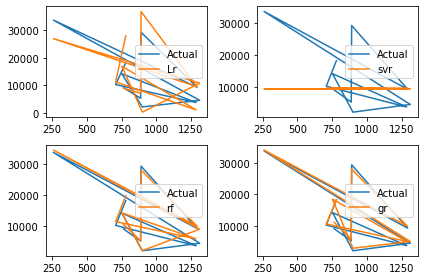

In [21]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

In [22]:
from sklearn import metrics

In [23]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [24]:
print(score1,score2,score3,score4)

0.7833214205203847 -0.07229746602305465 0.8624569090896764 0.8753459214167263


In [25]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [26]:
print(s1,s2,s3,s4)

4186.940106317014 8592.429900208082 2502.718104552239 2503.0097315879993


In [27]:
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

In [28]:
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [29]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  43809.529310305494


In [30]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [32]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  42433.68041330551
